- Import
- Data Preprocessing
    - Data Cleaning
    - Removing Stopwords
    - Lemmatization
    - Named Entity Recognition (mit SPACY)
- Model
    - Vectorization (TF-IDF, WordCount)
    - Model
        - Logistic Regression
        
    
    


# Import


In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
#import sklearn.model_selection
#import sklearn.preprocessing as preproc
#from sklearn.feature_extraction import text





!pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to /home/norbert/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/norbert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_fire = pd.read_csv('/home/norbert/AIDA/twitter-disaster/raw/disaster_tweets.csv', sep = ',' ) 


In [3]:
# Helperfunction


def info(dataframe):
  display(dataframe.head(5))
  display(dataframe.shape)
  display(dataframe.info())
  display(dataframe.describe())
  display(dataframe.dtypes)
  display(dataframe.isnull().sum())
  display(dataframe.sample(5))

In [4]:
#Analyse des Files

info(df_fire)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


(7613, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

,id,keyword,location,text,target
356,513,army,Studio,But if you build an army of 100 dogs and their...,1
5036,7180,mudslide,NaN,British bake off was great pretty hilarious mo...,0
3643,5192,fatalities,Pekanbaruå¡Batam Islandå¡Medan,There have been zero spider bite-related fatal...,0
3029,4350,earthquake,NaN,Contruction upgrading ferries to earthquake st...,1
3602,5142,fatal,??? ???? ??????,Investigators shift focus to cause of fatal Wa...,1


In [5]:
# Verteilung zwischen erfolreichen Feueralarm und Fehlalarm
fire_alarm = df_fire['target'] == 1
print(f'fire alarm: {fire_alarm.sum()}.')

fire_fail = df_fire['target'] == 0
print(f'fire alarm failed: {fire_fail.sum()}.')

fire alarm: 3271.
fire alarm failed: 4342.


In [6]:
#detailierte Betrachtung der Texteinträge
df_fire.loc[:,'text'].values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

# Data Preprocessing

In [7]:
# Entfernung http
df_fire['text'] = df_fire['text'].str.replace('http\S+|www.\S+', '', case=False)
df_fire['text'].head(5)


0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [8]:
#Helper-Function

def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", " ")
  text = text.replace("'", " ")
 

  digi_punct = "[^a-zA-Z']"
  text = re.sub(digi_punct, " ", text)

  text = " ".join(text.split())
  text = text.lower()
    
  

  return text

In [9]:
df_fire['text'] = df_fire['text'].apply(clean_text)
df_fire['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    people receive wildfires evacuation orders in ...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [10]:
#Entfernung von stopwords
my_stopwords = stopwords.words("english")
df_fire["text_wo_stopwords"] = df_fire["text"].apply(
    lambda text: " ".join([word for word in text.split() if word not in my_stopwords]))
df_fire.head()

,id,keyword,location,text,target,text_wo_stopwords
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,got sent photo ruby alaska smoke wildfires pou...


In [11]:
lemmatizer = WordNetLemmatizer()
df_fire['text_clean_lem']= df_fire['text_wo_stopwords'].apply(lambda text_wo_stopwords: " ".join([lemmatizer.lemmatize(word) for word in text_wo_stopwords.split()]))
df_fire.head()

,id,keyword,location,text,target,text_wo_stopwords,text_clean_lem
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,deeds reason earthquake may allah forgive us,deed reason earthquake may allah forgive u
1,4,NaN,NaN,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,residents asked shelter place notified officer...,resident asked shelter place notified officer ...
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1,people receive wildfires evacuation orders cal...,people receive wildfire evacuation order calif...
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfire pour...


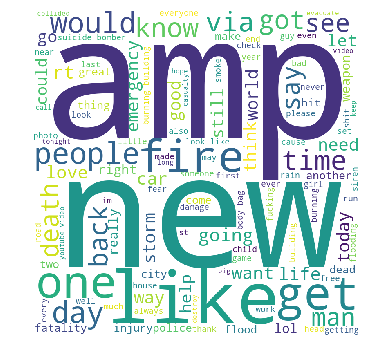

In [12]:
!pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(width=800, height=800, 
               background_color="white", 
               stopwords=[],
               min_font_size=14
               )
wordcloud = wc.generate(" ".join(df_fire["text_clean_lem"]))

plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [ ]:
df_fire.at[7610,'text_clean_lem']

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

scorel= cross_val_score(lr, X_train_scaled, y_train_enc, cv=10)
scorel